In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tree import Tree
import tree_to_prism as tp

In [2]:
file = 'tree/small_Data_Exfiltration.xml'
tree = Tree()
tree = tp.parse_file(file)
tree.root.to_string()

'Label: DataExfiltration\nRefinement: disjunctive\nType: Goal\nAction: \nCost: \nRole: Attacker'

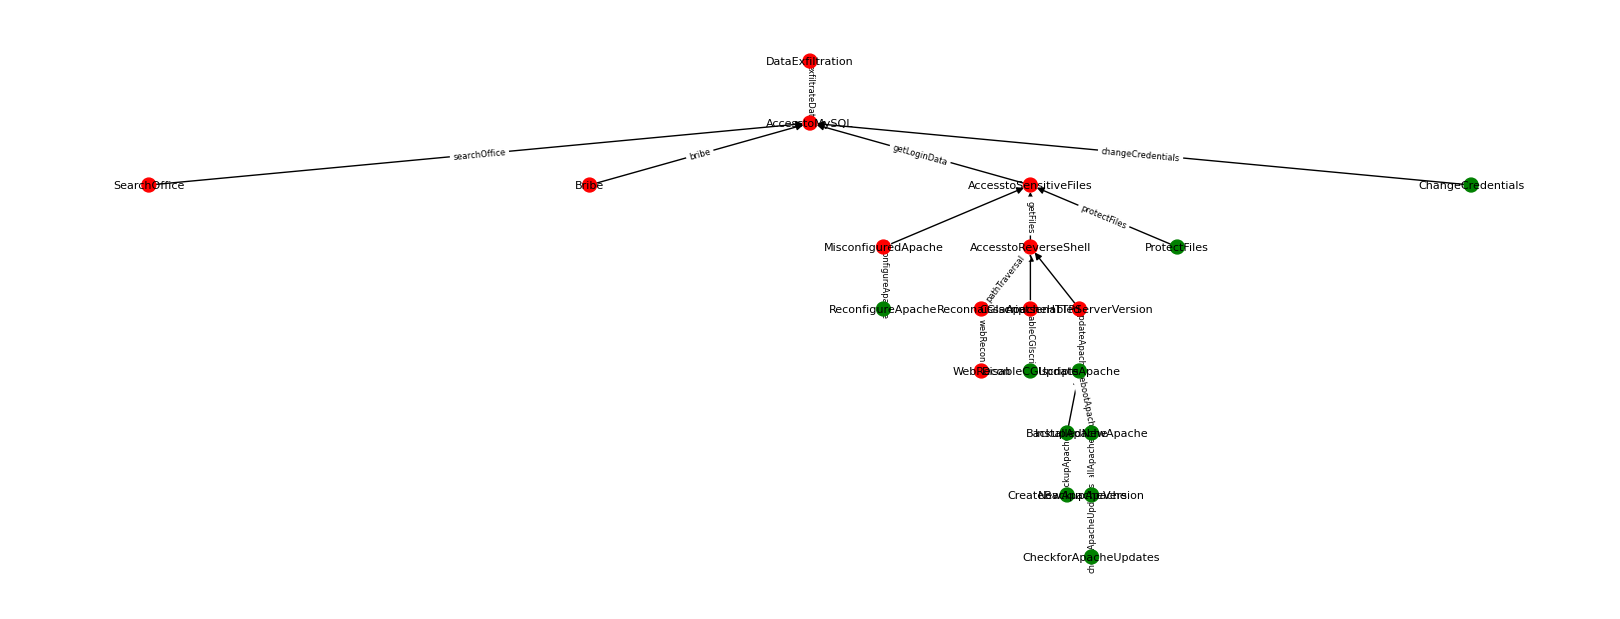

In [3]:
G = tree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = tree.hierarchy_pos(G, tree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    colors.append(G.nodes[node]['color']) 
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [4]:
df = tree.to_dataframe()
df.head()

,Label,Refinement,Type,Action,Cost,Role,Time,Parent,Children
0,DataExfiltration,disjunctive,Goal,,,Attacker,,None,{AccesstoMySQL}
1,AccesstoMySQL,disjunctive,Attribute,exfiltrateData,50,Attacker,,DataExfiltration,"{AccesstoSensitiveFiles, SearchOffice, Bribe, ..."
2,SearchOffice,disjunctive,Action,searchOffice,500,Attacker,,AccesstoMySQL,{}
3,Bribe,conjunctive,Action,bribe,500,Attacker,,AccesstoMySQL,{}
4,AccesstoSensitiveFiles,conjunctive,Attribute,getLoginData,10,Attacker,,AccesstoMySQL,"{MisconfiguredApache, AccesstoReverseShell, Pr..."


In [5]:
print(len(tree.nodes), len(tree.edges), tree.root.label)
subtree = tree.prune("AccesstoReverseShell")
print(len(subtree.nodes), len(subtree.edges), subtree.root.label)

21 20 DataExfiltration
21 18 DataExfiltration


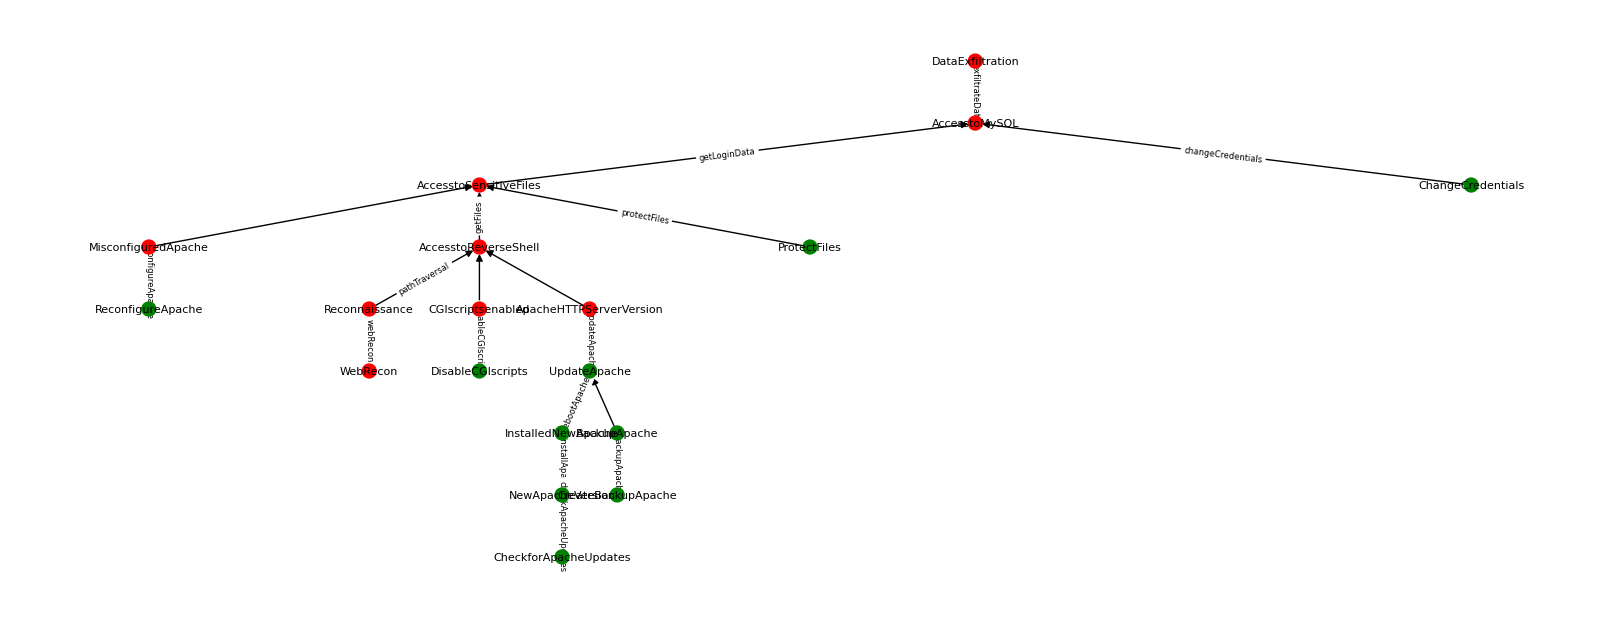

In [6]:
G = subtree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = subtree.hierarchy_pos(G, subtree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    try:
        colors.append(G.nodes[node]['color']) 
    except:
        print(node)
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [7]:
df = tree.to_dataframe()
df.head()

,Label,Refinement,Type,Action,Cost,Role,Time,Parent,Children
0,DataExfiltration,disjunctive,Goal,,,Attacker,,None,{AccesstoMySQL}
1,AccesstoMySQL,disjunctive,Attribute,exfiltrateData,50,Attacker,,DataExfiltration,"{AccesstoSensitiveFiles, SearchOffice, Bribe, ..."
2,SearchOffice,disjunctive,Action,searchOffice,500,Attacker,,AccesstoMySQL,{}
3,Bribe,conjunctive,Action,bribe,500,Attacker,,AccesstoMySQL,{}
4,AccesstoSensitiveFiles,conjunctive,Attribute,getLoginData,10,Attacker,,AccesstoMySQL,"{MisconfiguredApache, AccesstoReverseShell, Pr..."


In [8]:
string = tp.get_prism_model(tree) # get the prism model as a string
string

DataExfiltration


'smg\n\nplayer attacker\n\tattacker,\n\t[exfiltrateData], [searchOffice], [bribe], [getLoginData], [getFiles], [pathTraversal], [webRecon]\nendplayer\nplayer defender\n\tdefender,\n\t[changeCredentials], [protectFiles], [reconfigureApache], [disableCGIscripts], [updateApache], [rebootApache], [backupApache], [installApache], [checkApacheUpdates]\nendplayer\n\nglobal sched : [1..2];\n\nglobal DataExfiltration : bool;\nlabel "terminate" = DataExfiltration=true;\n\nglobal Reconnaissance : bool;\nglobal AccesstoMySQL : bool;\nglobal AccesstoReverseShell : bool;\nglobal AccesstoSensitiveFiles : bool;\nglobal MisconfiguredApache : bool init true;\nglobal CGIscriptsenabled : bool init true;\nglobal ApacheHTTPServerVersion : bool init true;\n\nmodule attacker\n\n\texfiltrateData : bool;\n\tgetFiles : bool;\n\tpathTraversal : bool;\n\tgetLoginData : bool;\n\tbribe : bool;\n\tsearchOffice : bool;\n\twebRecon : bool;\n\n\t[exfiltrateData] sched=1 & !DataExfiltration & !DataExfiltration & !exfiltr

In [9]:
tp.save_prism_model(string, 'prune.prism')  # save the model to a file and create the properties file